<a href="https://colab.research.google.com/github/DiogoFerreiraAlves02/MSC/blob/main/MSC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício 1 - Realizado por Diogo Alves 748 & Joana Ferreira 749 & Adriana Sousa 11006 & João Soares 11011 & Pedro Soares 11004**

In [53]:
# importar tudo o que é necessário para a realização de todas as partes do exercício
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Carregar o conjunto de dados completo
data, target = fetch_california_housing(return_X_y=True, as_frame=True)

**O dataset foi filtrado para serem utilizados apenas 3000 samples. Isto foi realizado uma vez que não existiu poder computacional para concluir a execução num tempo minimamente aceitável.**

In [36]:
# Filtar o dataset
scaler = StandardScaler()
data = scaler.fit_transform(data)

data_small = data[:3000]
target_small = target[:3000]

## **PARTE I**

In [19]:
# Divisão dos dados de treino e teste (70-30)
X_train, X_test, y_train, y_test = train_test_split(data_small, target_small, test_size=0.3, random_state=42)

# Definir os parâmetros a serem explorados
param_grid = {
    'C': [1,100,200],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2,3],
    'gamma': ['scale', 'auto']
}

# Criar uma instância do modelo SVR
svr = SVR()

# Realizar a pesquisa pelos melhores hiperparâmetros utilizando cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 100, 200], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

### **a. os resultados da accuracy dos modelos com os diferentes valores**
A accuracy é uma métrica comumente utilizada para avaliar modelos de classificação, não modelos de regressão. Para problemas de regressão, onde estamos a prever valores numéricos contínuos, a accuracy não é uma métrica apropriada. Algumas métricas comuns para avaliar modelos de regressão e que foram utilizadas ao longo do exercício passaram por:

**Erro Médio Quadrático (MSE)**: Calcula a média dos quadrados das diferenças entre as previsões e os valores reais. Quanto menor o MSE, melhor o desempenho do modelo.

**Coeficiente de Determinação (R²)**: Mede a proporção da variância dos valores de destino que pode ser explicada pelas variáveis independentes. Um valor de R² próximo de 1 indica um bom ajuste do modelo aos dados.

Abaixo foi realizado um bloco de código que demonstra os diversos modelos, com os diversos parâmetros e o seu mean test score.
O "mean_test_score" é a média dos valores de avaliação como o R², obtidos nas iterações de cross-validation para cada combinação de parâmetros. Essa média fornece uma estimativa do desempenho geral do modelo para uma determinada configuração de parâmetros.

In [37]:
# Obter os resultados de validação cruzada para cada combinação de parâmetros
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("\nParâmetros:", params)
    print("Mean Score:", mean_score)


Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Mean Score: 0.6747364636021616

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Mean Score: 0.454696700224695

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Score: 0.7857318058386942

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
Mean Score: 0.6747364636021616

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Mean Score: 0.4475246205917828

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Score: 0.7930491652353754

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Mean Score: 0.6747364636021616

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Mean Score: -6.74177513991869

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Score: 0.7857318058386942

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Mean Score: 

**Obter o melhor modelo e mostrar os resultados**

In [38]:
# Obter o melhor modelo encontrado
best_model = grid_search.best_estimator_

# Realizar as previsões nos conjuntos de treino e teste
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Cálculo do coeficiente de determinação (R²) e erro médio quadrático nos conjuntos de treino e teste
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nParâmetros do melhor modelo:", grid_search.best_params_)
print(f'R² do conjunto de teste: {r2_test}  Erro médio quadrático: {test_mse}')
print(f'R² do conjunto de treino: {r2_train}  Erro médio quadrático: {train_mse}')
print()


Parâmetros do melhor modelo: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
R² do conjunto de teste: 0.8196229902892692  Erro médio quadrático: 0.15954660689200764
R² do conjunto de treino: 0.8626728803937572  Erro médio quadrático: 0.1282143898268912



### **b. a sua análise crítica aos resultados obtidos nas várias experiências. O que pode dizer sobre a capacidade da generalização do melhor modelo?**
Com base nos resultados obtidos, podemos analisar a capacidade de generalização do melhor modelo.
Ao observar o R² do conjunto de teste, que é cerca de 0.820, podemos dizer que o modelo possui uma capacidade razoável de generalização. Neste caso, como o R² é de 0.820 podemos dizer que o modelo consegue prever aproximadamente 82% da variação nos dados de teste.No entanto, para ter uma avaliação mais completa, também consideramos o R² do conjunto de treino. Um R² de 0.863 indica que o modelo se ajusta bem aos dados de treino, prevendo corretamente cerca de 86% da variação presente.

Quanto ao erro médio quadrático (MSE), observamos que o MSE do conjunto de teste é de 0.160, o que significa que o modelo possui um erro médio de aproximadamente 0.160 ao fazer previsões nos dados de teste. O MSE do conjunto de treino é ainda menor, com um valor de 0.128, indicando que o modelo se ajusta ainda melhor aos dados de treino.

Em suma, com base nos resultados obtidos, podemos dizer que o melhor modelo apresenta uma capacidade razoável de generalização.

### **c. O melhor modelo está fazendo underfitting,overfitting, ou está no “sweet spot”**
Ao comparar o R² do conjunto de treino (0.863) e o R² do conjunto de teste (0.820), observamos que o R² do conjunto de treino é ligeiramente maior. Isso sugere que o modelo está a se ajustar um pouco melhor aos dados de treino do que aos dados de teste. Essa diferença não é significativa, mas pode indicar uma tendência leve de overfitting, onde o modelo se ajusta muito bem aos dados de treino, mas não generaliza tão bem para novos dados.
Além disso, ao analisar o erro médio quadrático (MSE), observamos que o MSE do conjunto de treino (0.128) é menor do que o MSE do conjunto de teste (0.160). Isso também indica que o modelo está a apresentar um desempenho melhor nos dados de treino em comparação com os dados de teste.
Com base nessas observações, podemos concluir que o modelo pode estar ligeiramente inclinado para overfitting. No entanto, como a diferença entre o desempenho nos conjuntos de treino e teste não é muito grande, podemos considerar que o modelo está em um ponto próximo ao sweet spot, onde este é capaz de generalizar bem para novos dados, mas ainda há espaço para melhorias.


**Foram também gerados dois gráfico para, de maneira visual, ser mais fácil acompanhar o erro médio quadrático e o R², tanto no conjunto de treino como no de teste**

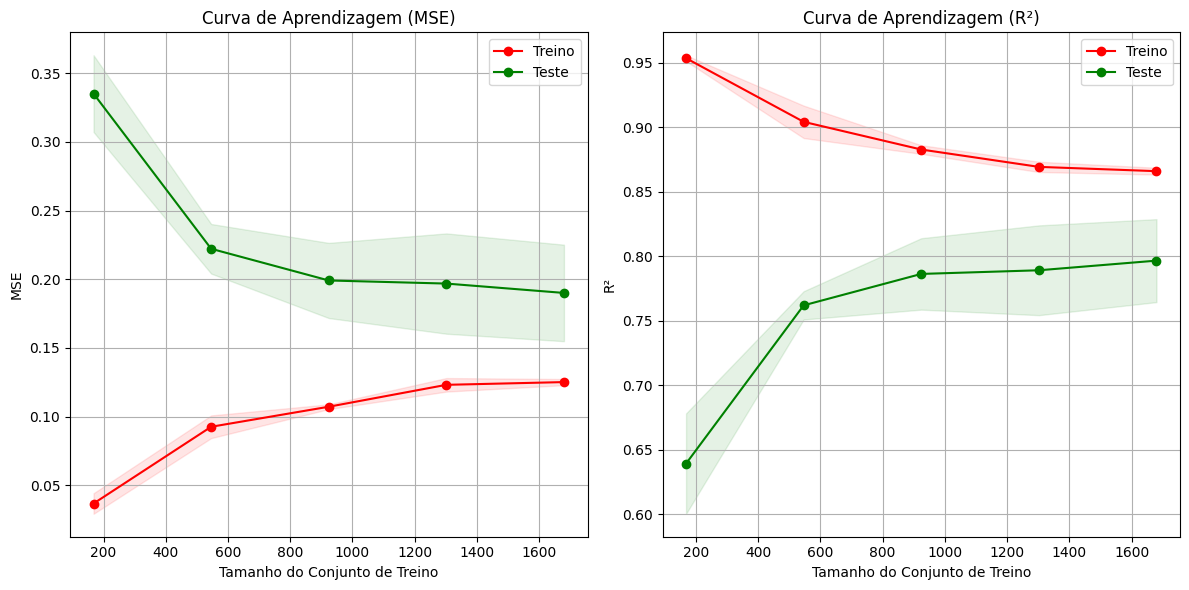

In [25]:
# Criar a curva de aprendizagem para MSE
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular a média e o desvio padrão dos scores de treino e teste para MSE
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Criar a curva de aprendizagem para R²
train_sizes_r2, train_scores_r2, test_scores_r2 = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2')

# Calcular a média e o desvio padrão dos scores de treino e teste para R²
train_scores_mean_r2 = np.mean(train_scores_r2, axis=1)
train_scores_std_r2 = np.std(train_scores_r2, axis=1)
test_scores_mean_r2 = np.mean(test_scores_r2, axis=1)
test_scores_std_r2 = np.std(test_scores_r2, axis=1)

# Criar a figura com uma grade de subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotar a curva de aprendizagem para MSE
axs[0].set_title("Curva de Aprendizagem (MSE)")
axs[0].set_xlabel("Tamanho do Conjunto de Treino")
axs[0].set_ylabel("MSE")
axs[0].grid()
axs[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axs[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axs[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treino")
axs[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")
axs[0].legend(loc="best")

# Plotar a curva de aprendizagem para R²
axs[1].set_title("Curva de Aprendizagem (R²)")
axs[1].set_xlabel("Tamanho do Conjunto de Treino")
axs[1].set_ylabel("R²")
axs[1].grid()
axs[1].fill_between(train_sizes_r2, train_scores_mean_r2 - train_scores_std_r2, train_scores_mean_r2 + train_scores_std_r2, alpha=0.1, color="r")
axs[1].fill_between(train_sizes_r2, test_scores_mean_r2 - test_scores_std_r2, test_scores_mean_r2 + test_scores_std_r2, alpha=0.1, color="g")
axs[1].plot(train_sizes_r2, train_scores_mean_r2, 'o-', color="r", label="Treino")
axs[1].plot(train_sizes_r2, test_scores_mean_r2, 'o-', color="g", label="Teste")
axs[1].legend(loc="best")

# Ajustar a posição dos subplots e exibir a figura
plt.tight_layout()
plt.show()


## **PARTE II**

**Para a parte 2 do exercício 1, foi utilizado como estimador o melhor modelo SVR encontrado anteriormente utilizando uma abordagem ensemble do tipo bagging.**

In [40]:
# Explorar diferentes valores para os argumentos do BaggingRegressor
n_estimators_values = [5, 10, 20, 100]
max_samples_values = [0.5, 0.7, 1.0]
max_features_values = [0.5, 0.7, 1.0]

best_score = -float('inf')  # Valor inicial para comparar com os scores encontrados

### **a. os resultados da accuracy dos modelos com os diferentes valores**
O excerto de código a seguir demonstra os diversos modelos, com os diversos parâmetros e respetivo score (R²) e MSE.


In [41]:
for n_estimators in n_estimators_values:
    for max_samples in max_samples_values:
        for max_features in max_features_values:
            # Criar uma instância do BaggingRegressor
            bagging_model = BaggingRegressor(estimator=best_model, n_estimators=n_estimators, max_samples=max_samples, max_features=max_features)

            # Treinar o modelo de BaggingRegressor
            bagging_model.fit(X_train, y_train)

            # Avaliar o desempenho do modelo no conjunto de teste
            test_predictions = bagging_model.predict(X_test)
            test_mse = mean_squared_error(y_test, test_predictions)
            r2_test = r2_score(y_test, test_predictions)

            print(f"'n_estimators': {n_estimators}, 'max_samples': {max_samples}, 'max_features': {max_features}")
            print(f"R² do conjunto de teste: {r2_test}")
            print(f"Erro médio quadrático do conjunto de teste: {test_mse}\n")

            # Verificar se o score atual é melhor que o melhor score anterior
            if r2_test > best_score:
                best_score = r2_test
                best_mse = test_mse
                best_n_estimators = n_estimators
                best_max_samples = max_samples
                best_max_features = max_features

'n_estimators': 5, 'max_samples': 0.5, 'max_features': 0.5
R² do conjunto de teste: 0.6914102629274818
Erro médio quadrático do conjunto de teste: 0.27295299745002954

'n_estimators': 5, 'max_samples': 0.5, 'max_features': 0.7
R² do conjunto de teste: 0.8039288075575033
Erro médio quadrático do conjunto de teste: 0.173428384879191

'n_estimators': 5, 'max_samples': 0.5, 'max_features': 1.0
R² do conjunto de teste: 0.8183461513105164
Erro médio quadrático do conjunto de teste: 0.1606759932086683

'n_estimators': 5, 'max_samples': 0.7, 'max_features': 0.5
R² do conjunto de teste: 0.7418446007420709
Erro médio quadrático do conjunto de teste: 0.2283429471888167

'n_estimators': 5, 'max_samples': 0.7, 'max_features': 0.7
R² do conjunto de teste: 0.8342576628550059
Erro médio quadrático do conjunto de teste: 0.14660198410120226

'n_estimators': 5, 'max_samples': 0.7, 'max_features': 1.0
R² do conjunto de teste: 0.8170071534616674
Erro médio quadrático do conjunto de teste: 0.161860360128610

In [42]:
print(f"Parâmetros do melhor modelo: 'n_estimators': {best_n_estimators}, 'max_samples': {best_max_samples}, 'max_features': {best_max_features}")
print(f"R² do melhor modelo: {best_score}  MSE: {best_mse}")

Parâmetros do melhor modelo: 'n_estimators': 20, 'max_samples': 0.7, 'max_features': 0.7
R² do melhor modelo: 0.8364481305045457  MSE: 0.14466447731166607


### **b. a sua análise crítica aos resultados obtidos nas várias experiências. O que pode dizer sobre a capacidade da generalização?**
Ao analisar os resultados, observamos que o modelo apresenta desempenho variado em diferentes combinações de parâmetros. No entanto, em geral, os valores de R² do conjunto de teste estão na faixa de 0.78-0.84 e o MSE do conjunto de teste está na faixa de 0.14-0.19.
Isto pode indicar que o modelo novamente tem uma capacidade razoávelmente boa de generalização, pois consegue prever uma porcentagem significativa da variação nos dados de teste e está a realizar previsões com erros médios moderados.

Já para o melhor modelo podemos dizer que este possui uma boa capacidade de generalização. O R² do conjunto de teste é de 0.836, o que indica que o modelo é capaz de explicar aproximadamente 83,6% da variação nos dados de teste. Além disso, o MSE é de 0.145, o que representa um erro médio relativamente baixo em relação aos valores alvo.

**Por curiosidade foi também gerado um gráfico para acompanhar visualmente o MSE dos modelos no conjunto de teste**

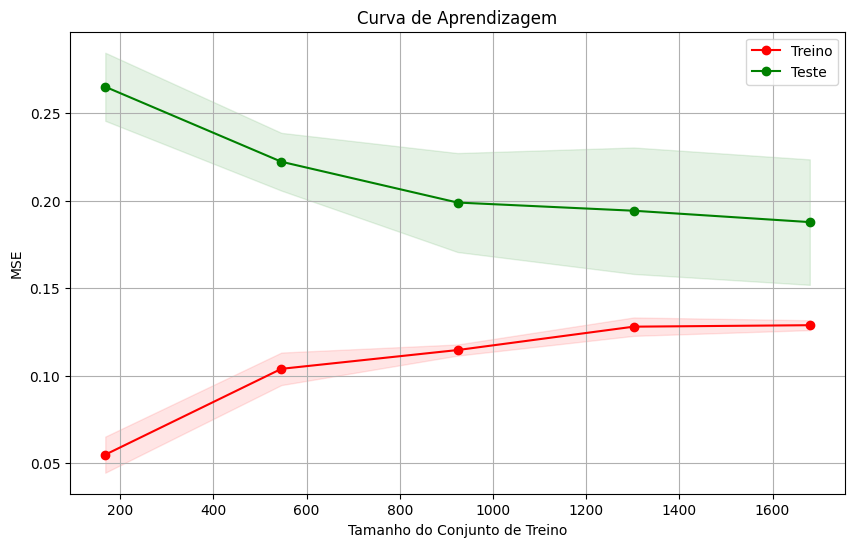

In [43]:
# Criar a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(bagging_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular a média e o desvio padrão dos scores de treino e teste
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizagem
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("MSE")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()


## **PARTE III**

**Para a parte 3 do exercício 1 foi considerado o algoritmo Random Forest. Foram utilizados diversos parâmetros, alguns recomendados pelo professor (max_features, max_leaf_nodes, min_samples_leaf) e ainda outros que foram utilizados uma vez que representaram melhorias nos resultados (n_estimators, max_depth, bootstrap).**

In [58]:
# Explorar diferentes valores para os argumentos do RandomForestRegressor
n_estimators_values = [5, 100, 200, 300]
max_features_values = ['sqrt', 'log2']
max_leaf_nodes_values = [None, 10, 100]
min_samples_leaf_values = [1, 5, 10]
max_depth_values = [10,50,80]
bootstrap_values = [True, False]

test_errors = []
best_score = -float('inf')  # Valor inicial para comparar com os scores encontrados

### **a. os resultados da accuracy dos modelos com os diferentes valores**
O excerto de código a seguir demonstra os diversos modelos, com os diversos parâmetros e respetivo score (R²) e MSE.

In [64]:
for n_estimators in n_estimators_values:
    for max_features in max_features_values:
        for max_leaf_nodes in max_leaf_nodes_values:
          for max_depth in max_depth_values:
            for bootstrap in bootstrap_values:
              for min_samples_leaf in min_samples_leaf_values:
                  # Criar uma instância do RandomForestRegressor
                  rf_model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features,
                                                  max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, max_depth = max_depth, bootstrap = bootstrap)

                  # Treinar o modelo de RandomForestRegressor
                  rf_model.fit(X_train, y_train)

                  # Avaliar o desempenho do modelo no conjunto de teste
                  test_predictions = rf_model.predict(X_test)
                  r2_test = r2_score(y_test, test_predictions)
                  test_mse = mean_squared_error(y_test, test_predictions)
                  test_errors.append(test_mse)

                  print(f"'n_estimators': {n_estimators}, 'max_features': {max_features}, 'max_leaf_nodes': {max_leaf_nodes}, 'min_samples_leaf': {min_samples_leaf}, 'max_depth': {max_depth}, 'bootstrap': {bootstrap}")
                  print(f"R² do conjunto de teste: {r2_test}")
                  print(f"Erro médio quadrático do conjunto de teste: {test_mse}\n")

                  # Verificar se o score atual é melhor que o melhor score anterior
                  if r2_test > best_score:
                      best_score = r2_test
                      best_mse = test_mse
                      best_n_estimators = n_estimators
                      best_max_features = max_features
                      best_max_leaf_nodes = max_leaf_nodes
                      best_min_samples_leaf = min_samples_leaf
                      best_max_depth = max_depth
                      best_bootstrap = bootstrap

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True
R² do conjunto de teste: 0.8394540390257212
Erro médio quadrático do conjunto de teste: 0.14200569886783637

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'max_depth': 10, 'bootstrap': True
R² do conjunto de teste: 0.843410389249191
Erro médio quadrático do conjunto de teste: 0.1385062381835546

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'max_depth': 10, 'bootstrap': True
R² do conjunto de teste: 0.8454458238006967
Erro médio quadrático do conjunto de teste: 0.13670586086959266

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False
R² do conjunto de teste: 0.843163101870362
Erro médio quadrático do conjunto de teste: 0.13872496817737506

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_sam

In [65]:
print(f"Parâmetros do melhor modelo: 'n_estimators': {best_n_estimators}, 'max_features': {best_max_features}, 'max_leaf_nodes': {best_max_leaf_nodes}, 'min_samples_leaf': {best_min_samples_leaf}, 'max_depth': {best_max_depth}, 'bootstrap': {best_bootstrap}")
print(f"R² do melhor modelo: {best_score} MSE: {best_mse}")

Parâmetros do melhor modelo: 'n_estimators': 100, 'max_features': log2, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'max_depth': 80, 'bootstrap': True
R² do melhor modelo: 0.8891061009476168 MSE: 0.09808758525937576


### **b. a sua análise crítica aos resultados obtidos nas várias experiências. O que pode dizer sobre a capacidade da generalização?**
Com base nos resultados obtidos, podemos fazer as seguintes observações sobre a capacidade de generalização do modelo:

O R² do conjunto de teste varia entre aproximadamente 0.80 e 0.882, o que indica que o modelo tem um bom poder de previsão. Quanto mais próximo de 1 for o valor do R², melhor será a capacidade de generalização.

O MSE do conjunto de teste varia entre aproximadamente 0.099 e 0.19. Valores menores de MSE indicam uma melhor capacidade de generalização.

Observa-se que diferentes combinações de parâmetros apresentam resultados semelhantes em termos de R² e MSE do conjunto de teste. Isso indica que o modelo pode ser robusto o suficiente para generalizar bem, independentemente de algumas variações nos parâmetros.

### **c. O melhor modelo está fazendo underfitting,overfitting, ou está no “sweet spot”**
Considerando as métricas que foram utilizadas, podemos dizer que o modelo está  num "sweet spot", uma vez que este possui um bom equilíbrio entre a capacidade de generalização e ajuste aos dados. O R² próximo de 1 indica que o modelo está a capturar uma quantidade significativa da variância dos dados de teste, enquanto o MSE baixo indica que os erros de previsão são relativamente pequenos.

### **d. Compara o resultado de bagging com os resultados do random forest. Como os erros de test da crossvalidação são distribuidos?”**
Observando as métricas, podemos ver que o Random Forest obteve um desempenho superior ao BaggingRegressor. O Random Forest apresentou um R² mais alto, indicando que é capaz de prever uma maior proporção da variância dos dados de teste. Além disso, o MSE do Random Forest também é menor, indicando que os erros de previsão são menores em comparação com o BaggingRegressor.
Concluimos então que, com base nesses resultados, o Random Forest é preferível em termos de desempenho e capacidade de generalização em comparação com o BaggingRegressor.

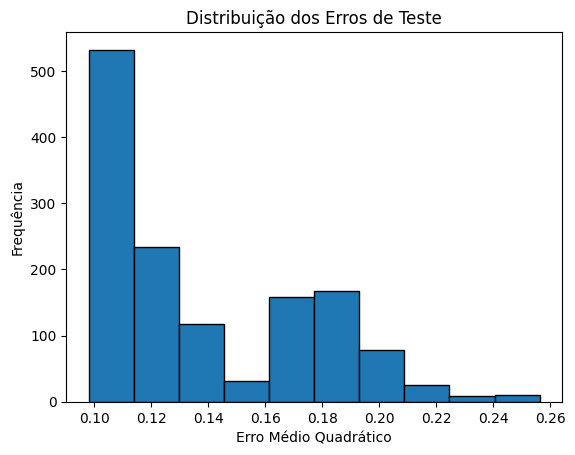

In [66]:
# Plotar o histograma dos erros de teste
plt.hist(test_errors, bins=10, edgecolor='black')
plt.xlabel('Erro Médio Quadrático')
plt.ylabel('Frequência')
plt.title('Distribuição dos Erros de Teste')
plt.show()